# Session 6 - Measuring Similarity, clustering, and more

#### more suggestions for data
https://snap.stanford.edu/data/web-Amazon.html - thanks to Leo. 

## Other types of classification

Last week we talked about Naive Bayes, Decision Trees, and logistic regression as ways to do classification/prediction with our feature spaces as inputs.  

Why not KNN or K-means?  We can certainly use them but not before we discuss distance measures for vectorized text.  How do you know how "close" one neighbor is to another?  How do you know how "far" one observation is from the centroid?

We can turn to our old standby Euclidean distance



In [4]:
# set up the environment
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
pathname = "C:\\Users\\Owner\\Documents\\MS in BIA\\Teaching\\2018 Fall\\Text Mining\\" #where to get/put files
pd.set_option('display.max_colwidth', 15000) #important for getting all the text


Remember: the **Euclidean distance** calculation can be defined as:

\begin{equation} d = \sqrt{(X_1 - Y_1)^2 + (X_2 - Y_2)^2 + (X_3 - Y_3)^2 + ... (X_d - Y_d)}\end{equation}

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# visual representation of distance
coords1 = [1, 2, 3]
coords2 = [4, 5, 6]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter((coords1[0], coords2[0]), 
        (coords1[1], coords2[1]),
        (coords1[2], coords2[2]),
         color="k", s=150)

ax.plot((coords1[0], coords2[0]), 
        (coords1[1], coords2[1]),
        (coords1[2], coords2[2]),
         color="r")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(x=2.5, y=3.5, z=4.0, s=' ')

plt.title('Euclidean distance between 2 3D-coordinates') 

In [ ]:
# let's take an easier example
# in one line of code
from math import sqrt

one = [1,1,1]
two = [1,1,3]


print(sqrt(sum((x-y)**2 for x,y in zip(one, two))))

In [ ]:
# and more explicitly
to_sum = []
i = 0
for x,y in zip(one, two):
    i += 1
    print('step 1.' + str(i) + ': print x and y')
    print( str(x) + ', ' + str(y))
    print( 'step 2.' + str(i) + ': subtract y from x and square')
    print( (x-y)**2)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    to_sum.append((x-y)**2)

print('step 3: sum squares')
print(sum(to_sum))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('step 4: square root of sum')
print(sqrt(sum(to_sum)))

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
X = [one, two] #newest version requires matrix not two lists

euclidean_distances(X)

In [ ]:
#more detailed example
# diagonal elements are always zero because that's the distance of the item to itself

A = [[1,0,0,1,0],
     [1,0,0,1,0],
     [1,0,0,0,0],
     [1,1,1,0,1]]

print(euclidean_distances(A))


## Another important concept: similarity

How close or far one vector is from another can be expressed another way: how similar is one vector from another?

This actually makes more sense for our text examples.  How "close" one sentence (or string) is to another is stranger than how "similar" that sentence (or string) is to another.

Introducing **cosine similarity**

An example: https://www.federalreserve.gov/econresdata/notes/feds-notes/2015/semantic-analysis-of-the-FOMCs-postmeeting-statement-20150930.html

The **cosine similarity** measure for two vectors is defined as:

$$ cos(x,y) = \frac{a \cdot b}{||a|| ||b||} $$

Link: http://blog.christianperone.com/?p=2497

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(X))

In [ ]:
def cosine_similarity_manual(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v1)/(||v1||*||v2||)'
    # the L2-normalized dot product of vectors
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        print("For element " + str(i))
        print('step 1:  print x and y')
        x = v1[i]
        y = v2[i]
        print(str(x) + ', ' + str(y))
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('step 2: sum products x,y,xy')
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
        print("sum x squared: " + str(sumxx))
        print("sum y squared: " + str(sumyy))
        print("sum x*y: " + str(sumxy))
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('step 3: divide sumxy by square root of product sum x, sum y:')
    print(str(sumxy) + " divided by sqrt("+str(sumxx)+"*"+str(sumyy)+")" )
    print(str(sumxy)+ "/" + str(sqrt(sumxx*sumyy)))
    return(sumxy/sqrt(sumxx*sumyy))


cosine_similarity_manual(one, two)

In [ ]:
A = [[1,0,0,1,0],
     [1,0,0,1,0],
     [1,0,0,0,0],
     [1,1,1,0,1]]

print(cosine_similarity(A))


### Remember: 

#### Euclidean distance: more alike vectors are closer together so smaller distances mean more alike.  Smaller numbers mean better fit.  Range from 0 to ? 

#### Cosine similarity:  if vectors are alike, they have more similarity therefore the similarity measure is a larger number.  Bigger numbers mean better fit.  Range from -1 to 1

##### Wait, Negative?




In [ ]:
from IPython.display import display, Image
display(Image(url= "http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png"))

#### Stupidly simple example (aka why you care about normalization, weights, and vectorizer choice)

I can only draw in two dimensions so let's work with text snippets
(inspired by http://www.derivativesinvesting.net/article/7072111745/simple-text-retrieval-vector-space-model-explanation/)

* D1 =  "it is hard to determine"
* D2 =  "this drive has 100GB of memory. make sure the hard drive is fully installed" 

Let's draw this in "hard/drive" space.
* D1:  hard: 1, drive: 0
* D2:  hard: 1, drive: 2

In [ ]:
d1 = [1,0]
d2 = [1,2]
D = [d1, d2]
print(euclidean_distances(D))
print("~~~~~~~~~~~~~~~~~~~")
print(cosine_similarity(D))


In [ ]:
# Now add a third snippet
D1 =  "it is hard to determine"
D2 =  "this drive has 100GB of memory. make sure the hard drive is fully installed"
D3 = "as part of the factory acceptance, every unit gets a hard drive test."

d3 = [1,1]

newD = [d1, d2, d3]

# Which document is D3 more similar to?
print(euclidean_distances(newD))
print("~~~~~~~~~~~~~~~~~~~")
print(cosine_similarity(newD))



#### Euclidean distance would say that D1 & D2 are equally similar to D3

#### Cosine similarity would say that D2 and D3 are more similar 



In [ ]:
display(Image(url= "http://images.slideplayer.com/27/8959772/slides/slide_32.jpg"))

display(Image(url= "http://nlp.stanford.edu/IR-book/html/htmledition/img411.png"))

### How does our vectorizer choice affect the measure?

In [ ]:
HDexample = [D1, D2, D3]
print(HDexample)

In [ ]:
#just like CountVectorizer
cvdrive = TfidfVectorizer(binary=False, stop_words='english', use_idf = False, norm = None) 
cv_drive = cvdrive.fit_transform(HDexample)
print(type(cv_drive))
print(cv_drive.shape)
print(cvdrive.get_feature_names())
print(cv_drive.toarray())



In [ ]:
#handy way to compare things in one line of code

#We want to use the first document as our reference point and see how the other documents compare
#We could use the matrix but this might be easier to read

print("Euclidean distances:")
print(euclidean_distances(cv_drive[0:1], cv_drive))
print("Cosine similarities:")
print(cosine_similarity(cv_drive[0:1], cv_drive))


In [ ]:
# what if we use weights? 
cvdrivetf = TfidfVectorizer(stop_words='english', norm = None) 
cv_drivetf = cvdrivetf.fit_transform(HDexample)
print(type(cv_drivetf))
print(cv_drivetf.shape)
print(cvdrivetf.get_feature_names())
print(cv_drivetf.toarray())

In [ ]:
print("Euclidean distances:")
print(euclidean_distances(cv_drivetf[0:1], cv_drivetf))
print("Cosine similarities:")
print(cosine_similarity(cv_drivetf[0:1], cv_drivetf))


#### Tfidf weights might be important for other reasons but they don't affect the similarity calculations. (Note: foreshadowing)

#### We can use normalization to get euclidean distance and cosine similarity to agree

L1 normalization: least absolute differences

L2 normalization: least squares - this is the default for tfidf vectorizer

http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/

Normalization matters: Euclidean distance doesn't take into account vector length, cosine similarity does


In [ ]:
# try l1 normalization first 
cvdrivetf1 = TfidfVectorizer(use_idf = False, stop_words='english', norm = "l1") 
cv_drivetf1 = cvdrivetf1.fit_transform(HDexample)
print(type(cv_drivetf1))
print(cv_drivetf1.shape)
print(cvdrivetf1.get_feature_names())
print(cv_drivetf1.toarray())

In [ ]:
print("Euclidean distances:")
print(euclidean_distances(cv_drivetf1[0:1], cv_drivetf1))

print("Cosine similarities:")
print(cosine_similarity(cv_drivetf1[0:1], cv_drivetf1))


In [ ]:
# try l2 normalization next
cvdrivetf2 = TfidfVectorizer(use_idf = False, stop_words='english', norm = "l2") 
cv_drivetf2 = cvdrivetf2.fit_transform(HDexample)
print(type(cv_drivetf2))
print(cv_drivetf2.shape)
print(cvdrivetf2.get_feature_names())
print(cv_drivetf2.toarray())

In [ ]:
print("Euclidean distances:")
print(euclidean_distances(cv_drivetf2[0:1], cv_drivetf2))

print("Cosine similarities:")
print(cosine_similarity(cv_drivetf2[0:1], cv_drivetf2))


### When should you use which?

The key is in how much variability there is in document length.  

Cosine similarity is not affected by vector length while Euclidean distance is.  However, normalization can be used to account for this.



## Now let's consider an application where distance measures are used

## KNN

Nearest neighbor classification requires a distance concept in order to determine which neighbors are nearest. 

You can do it from scratch: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


KNN and TFIDF: http://www.sciencedirect.com/science/article/pii/S1877705814003750



** class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, kwargs)[source] **

Arguments:
* n_neighbors - number of neighbors to check
* weights - weight function used in prediction. 
* Possible values:
    * ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    * ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    * These are NOT the same as TfIdf weights
* metric : distance metric with the default setting = ‘minkowski’. "Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance." (Wikipedia)
* p: power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 

Default settings are k=5, weights = uniform, minkowski distance with p = 2 => Euclidean distance
    

Good reference with both R and Python: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [ ]:
# pictures of uniform versus distance
from IPython.display import display, Image

display(Image(url='http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png'))
display(Image(url='http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_002.png'))

In [ ]:
#open CSV file
newsdf = pd.read_csv(pathname + "nytnews_tagged.csv", index_col = 0) 
print(newsdf.shape)

newsdf.head()


In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
newsdf['Audience'].value_counts().plot(kind='bar')


In [ ]:
#create our feature space - use code from last week
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("english")
my_stopwords = nltk_stopwords + ["br", "said", "0", '000', '10', '100', '11', '12', '13', '14', u'15', u'16', u'17', u'18', u'19', u'20', u'25', u'30', u'40', u'50', u'500', u'60']

# instantiate vectorizer

tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.95, 
                        min_df=0.05,
                        ngram_range = (1,2)) 


# fit and transform text
tfidf_dm = tfidf1.fit_transform(newsdf['cleantext'])


In [ ]:
# create train-test split
from sklearn.model_selection import train_test_split

X = tfidf_dm.toarray()  #remember this is the output from the vectorizer and we are turning it into an array


y = newsdf['Audience'].values #this is an array of labels

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [ ]:
# loading library
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


# make predictions
knn1_expected = y_test
knn1_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn1_expected, knn1_predicted)))
print(metrics.classification_report(knn1_expected, knn1_predicted))

In [ ]:
# instantiate learning model (k = 3 and let's use Manhattan distance - does this make sense?)
model = KNeighborsClassifier(n_neighbors=3, p = 1)
model.fit(X_train, y_train)


# make predictions
knn2_expected = y_test
knn2_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn2_expected, knn2_predicted)))
print(metrics.classification_report(knn2_expected, knn2_predicted))

In [ ]:
# what if we change the number of neighbors?

# instantiate learning model 
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


# make predictions
knn3_expected = y_test
knn3_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn3_expected, knn3_predicted)))
print(metrics.classification_report(knn3_expected, knn3_predicted))

In [ ]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,35))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

#takes some time, get a soda...
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
# what if we change the number of neighbors?

# instantiate learning model 
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, y_train)


# make predictions
knn2_expected = y_test
knn2_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn2_expected, knn2_predicted)))
print(metrics.classification_report(knn2_expected, knn2_predicted))

# What about unsupervised learning?  


## Remember K-means?

The **k-means** algorithm takes a dataset X of N points as input, together with a parameter K specifying how many clusters to create. The output is a set of K cluster centroids and a labeling of X that assigns each of the points in X to a unique cluster. All points within a cluster are closer in distance to their centroid than they are to any other centroid. By default, k-means uses the squared Euclidean distance measure.

https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

Two things to note:
* K-means are very sensitive to feature scaling - IDF weighting helps improve the quality of the clustering by quite a lot. (In case you forgot why: http://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering)
* As k-means is optimizing a non-convex objective function, it will likely end up in a local optimum. Several runs with independent random init might be necessary to get a good convergence.

http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

In [2]:
from IPython.display import display, Image

print("In motion: It takes 7 iterations to converge on 7 centroids with 100 observations")
display(Image(url='https://datasciencelab.files.wordpress.com/2013/12/p_n100_k7.gif'))

In motion: It takes 7 iterations to converge on 7 centroids with 100 observations


In [3]:
print("In motion: It takes more iterations to converge on 3 centroids with 200 observations")
display(Image(url='https://datasciencelab.files.wordpress.com/2013/12/p_n200_k3.gif'))

In motion: It takes more iterations to converge on 3 centroids with 200 observations


### Clustering with documents 

Great example with clustering on top 100 IMDB movies: http://brandonrose.org/clustering

In [5]:
from sklearn.cluster import KMeans
tfidf_simple = TfidfVectorizer(lowercase=True, 
                        stop_words= 'english', 
                        ) 

# let's start with a simple example for clustering:  our group tweets again

friend1 = "Machine learning is super fun"
friend2 = "Python is super, super cool"
friend3 = "Statistics is cool, too"
friend4 = "Fun? Data science is more than fun"
friend5 = "Python is great for machine learning"
friend6 = "I like football"
friend7 = "Football is great to watch"
textStr = [friend1, friend2, friend3, friend4, friend5, friend6, friend7]
print(textStr)

# fit and transform text

simple_dm = tfidf_simple.fit_transform(textStr)
My_k = 3
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, n_init=1, random_state = 42,
                verbose=True)
km.fit(simple_dm)
clusters = km.labels_.tolist()

print(clusters)

['Machine learning is super fun', 'Python is super, super cool', 'Statistics is cool, too', 'Fun? Data science is more than fun', 'Python is great for machine learning', 'I like football', 'Football is great to watch']
Initialization complete
Iteration  0, inertia 4.735
Iteration  1, inertia 2.910
Converged at iteration 1: center shift 0.000000e+00 within tolerance 5.850332e-06
[1, 1, 2, 1, 1, 0, 0]


In [6]:
# let's make a data frame
text_df = pd.DataFrame(textStr, columns =["Text"])

text_df['Cluster'] = clusters
text_df

,Text,Cluster
0,Machine learning is super fun,1
1,"Python is super, super cool",1
2,"Statistics is cool, too",2
3,Fun? Data science is more than fun,1
4,Python is great for machine learning,1
5,I like football,0
6,Football is great to watch,0


In [7]:
# let's use our vectorized news articles and create clusters 

news_dm = tfidf_dm.toarray()
My_k = 3
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, random_state = 42)
news_k = km.fit(news_dm)
clusters = km.labels_.tolist()
newsdf['clusters'] = clusters
print(newsdf['clusters'].value_counts())


NameError: name 'tfidf_dm' is not defined

In [ ]:
newsdf.head()


In [8]:
#how many clusters? this takes some time

# finding an optimal value for k
k_range = range(1,20)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 42).fit(news_dm) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

NameError: name 'news_dm' is not defined

In [ ]:
# calc euclidean dist from each point to each cluster center
from scipy.spatial.distance import cdist, pdist

k_euclid = [cdist(news_dm, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(news_dm)**2) / news_dm.shape[0]

# between cluster sum of squares
bss = tss - wcss

NameError: name 'bss' is not defined

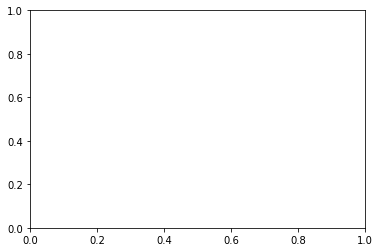

In [11]:
# plot elbow chart
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, '^-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

In [ ]:
# create clusters - 

news_dm = tfidf_dm.toarray()
My_k = 10
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, random_state = 42)
news_k = km.fit(news_dm)
clusters = km.labels_.tolist()
newsdf['clusters'] = clusters

In [ ]:
print(newsdf['clusters'].value_counts())
newsdf.head()

### Main take aways:
* We can calculate distance between two vectors in Nspace - this is a measure of similarity of the vector space representation of the text.  
* Normalization might be necessary to get the correct distance measure. 
* KNN is a classification method based on distance and can be used for prediction. 
* Kmeans clustering is an unsupervised learning method based on distance.
* Supervised versus unsupervised learning is another choice that the data scientist needs to make(on top of which classifier to use with which settings if doing supervised learning, label creation options (dictionary/index), preprocesing options (stop word lists, stemming/lemmatization), vectorizer options, parameter settings, etc.))

